# Titanic Machine Learning From Disaster

## Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

## Loading the Data

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Explore the training data
print(train_df.head())
print(train_df.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

## Data Preprocessing

In [3]:
# Imputing missing values
impute_age = SimpleImputer(strategy="median")
train_df['Age'] = impute_age.fit_transform(train_df[['Age']])

# Check if 'Embarked' column exists
if 'Embarked' in train_df.columns:
    train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
else:
    print("'Embarked' column not found in the dataset.")
train_df['Cabin'] = train_df['Cabin'].notna().astype(int)

# Converting categorical variables
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
train_df = pd.get_dummies(train_df, columns=['Embarked'])

# Feature engineering
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch']
train_df['IsAlone'] = (train_df['FamilySize'] == 0).astype(int)

# Dropping unnecessary features
train_df.drop(['Ticket', 'Name', 'SibSp', 'Parch'], axis=1, inplace=True)

# Scaling numerical features
scaler = StandardScaler()
train_df[['Age', 'Fare', 'FamilySize']] = scaler.fit_transform(train_df[['Age', 'Fare', 'FamilySize']])
train_df

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone
0,1,0,3,0,-0.565736,-0.502445,0,False,False,True,0.059160,0
1,2,1,1,1,0.663861,0.786845,1,True,False,False,0.059160,0
2,3,1,3,1,-0.258337,-0.488854,0,False,False,True,-0.560975,1
3,4,1,1,1,0.433312,0.420730,1,False,False,True,0.059160,0
4,5,0,3,0,0.433312,-0.486337,0,False,False,True,-0.560975,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,-0.181487,-0.386671,0,False,False,True,-0.560975,1
887,888,1,1,1,-0.796286,-0.044381,1,False,False,True,-0.560975,1
888,889,0,3,1,-0.104637,-0.176263,0,False,False,True,1.299429,0
889,890,1,1,0,-0.258337,-0.044381,1,True,False,False,-0.560975,1


## Exploratory Data Analysis

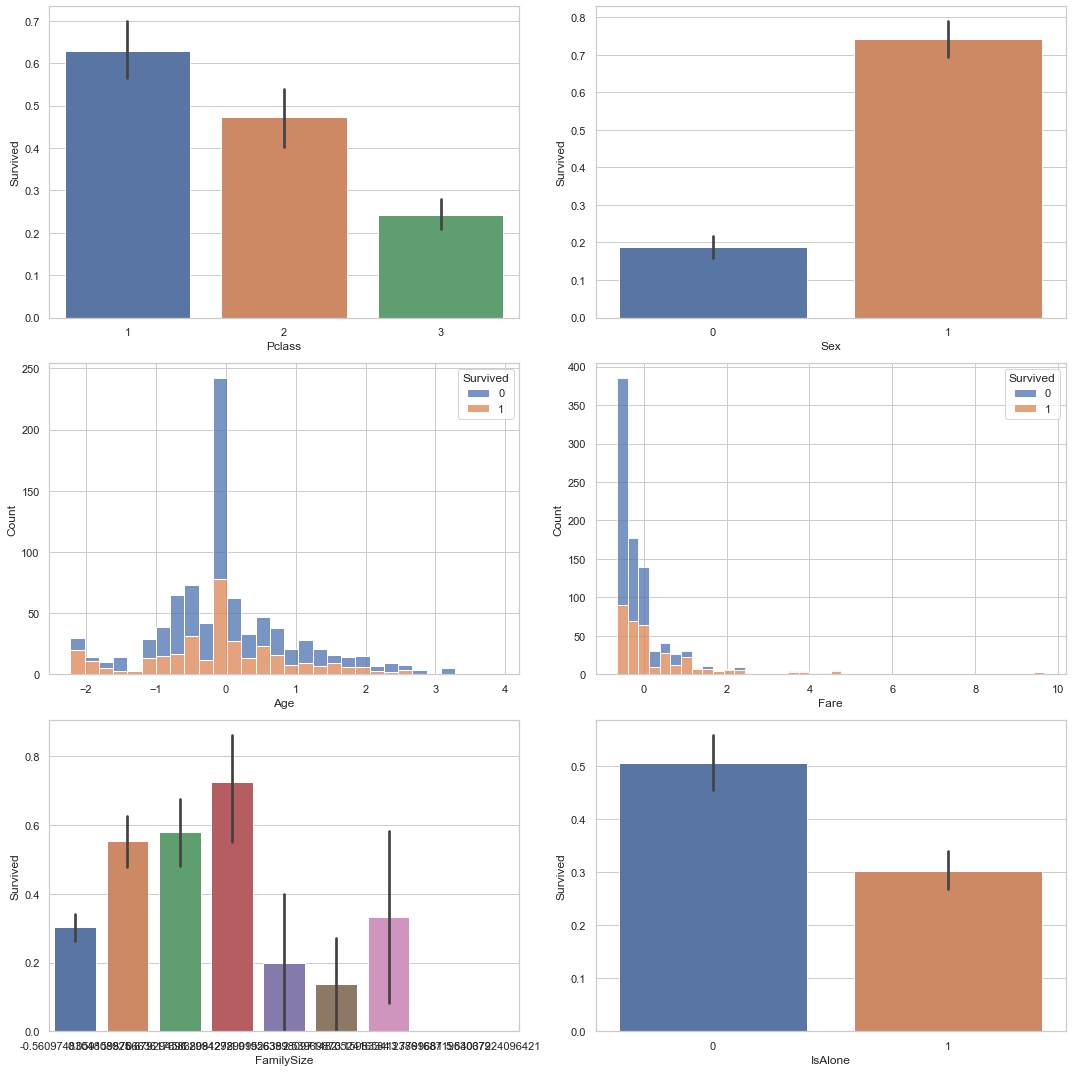

Overall Survival Rate on Training Data: 0.3838383838383838


In [4]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Analyzing the Overall Survival Rate
overall_survival_rate = train_df['Survived'].mean()

# Creating plots to analyze feature correlations with survival
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Pclass vs Survival
sns.barplot(x='Pclass', y='Survived', data=train_df, ax=axes[0, 0])

# Sex vs Survival
sns.barplot(x='Sex', y='Survived', data=train_df, ax=axes[0, 1])

# Age vs Survival
sns.histplot(data=train_df, x='Age', hue='Survived', multiple='stack', bins=30, ax=axes[1, 0])

# Fare vs Survival
sns.histplot(data=train_df, x='Fare', hue='Survived', multiple='stack', bins=40, ax=axes[1, 1])

# FamilySize vs Survival
sns.barplot(x='FamilySize', y='Survived', data=train_df, ax=axes[2, 0])

# IsAlone vs Survival
sns.barplot(x='IsAlone', y='Survived', data=train_df, ax=axes[2, 1])

plt.tight_layout()
plt.show()

print("Overall Survival Rate on Training Data:", overall_survival_rate)

## Model Training

In [5]:
X = train_df.drop(['Survived', 'PassengerId'], axis=1)
y = train_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Model Evaluation

In [6]:
y_pred = random_forest_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8100558659217877
Precision: 0.7702702702702703
Recall: 0.7702702702702703
Confusion Matrix:
 [[88 17]
 [17 57]]


## Preparing the Test Data for Predictions

In [7]:
# Apply the same preprocessing to the test data
test_df['Age'] = impute_age.transform(test_df[['Age']])
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())
test_df['Cabin'] = test_df['Cabin'].notna().astype(int)
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})

# Check if 'Embarked' column exists before creating dummy variables
if 'Embarked' in test_df.columns:
    test_df = pd.get_dummies(test_df, columns=['Embarked'], drop_first=True)

# Create 'FamilySize' and 'IsAlone' features
if 'SibSp' in test_df.columns and 'Parch' in test_df.columns:
    test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch']
    test_df['IsAlone'] = (test_df['FamilySize'] == 0).astype(int)

# Drop unnecessary columns only if they exist
columns_to_drop = ['Ticket', 'Name', 'SibSp', 'Parch']
for col in columns_to_drop:
    if col in test_df.columns:
        test_df.drop(col, axis=1, inplace=True)

# Scale numerical features
test_df[['Age', 'Fare', 'FamilySize']] = scaler.transform(test_df[['Age', 'Fare', 'FamilySize']])

# Add missing dummy columns if they are not present in the test set
for col in set(X_train.columns) - set(test_df.columns):
    test_df[col] = 0

# Reorder columns to match the training set
test_df = test_df[X_train.columns]
test_df

,Pclass,Sex,Age,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone
0,3,0,0.394887,-0.490783,0,0,True,False,-0.560975,1
1,3,1,1.355510,-0.507479,0,0,False,True,0.059160,0
2,2,0,2.508257,-0.453367,0,0,True,False,-0.560975,1
3,3,0,-0.181487,-0.474005,0,0,False,True,-0.560975,1
4,3,1,-0.565736,-0.401017,0,0,False,True,0.679295,0
...,...,...,...,...,...,...,...,...,...,...
413,3,0,-0.104637,-0.486337,0,0,False,True,-0.560975,1
414,1,1,0.740711,1.544246,1,0,False,False,-0.560975,1
415,3,0,0.702286,-0.502445,0,0,False,True,-0.560975,1
416,3,0,-0.104637,-0.486337,0,0,False,True,-0.560975,1


## Making Predictions on the Test Set

In [8]:
# Making predictions on the test dataset
test_predictions = random_forest_model.predict(test_df)

# Creating a DataFrame for the predictions
prediction_df = pd.DataFrame({
    'PassengerId': test_df.index + 1,  # Adjusting index to match PassengerId
    'Survived': test_predictions
})
prediction_df.to_excel("titanic_disaster.xlsx", index=False)
# Displaying the first few predictions
prediction_df.head(10)

,PassengerId,Survived
0,1,0
1,2,0
2,3,0
3,4,1
4,5,1
5,6,0
6,7,0
7,8,0
8,9,1
9,10,0
